<a href="https://colab.research.google.com/github/Alan-Hans/Challenge-Data-Scientist/blob/developement/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This challenge requires to predict the probability of delay of flights at Santiago de Chile Airport (SCL) using a provided dataset. This work was developed by Alan Hans Bitterlich Koning, email: Alan.bitterlich.k@gmail.com. The index of this notebook is the following: 
```
1.- Import data 
2.- EDA
3.- Models
4.- Results
5.- Comments


#1.- Import data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/Alan-Hans/Challenge-Data-Scientist/main/dataset_SCL.csv'

df = pd.read_csv(url)

<ipython-input-1-b0cb3f0119c9>:9: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [2]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


Description of every column
```
Fecha-I: Scheduled date and time of departure (local time) in format "YYYY-MM-DD hh:mm:ss" (year-month-day hour:minute:second).
Vlo-I: Scheduled flight number (text)
Ori-I: Origin city code (text)
Des-I: destination city code. (text)
Emp-I: Scheduled airline code (text)
Fecha-O: Date and time of arrival (local time) in format "YYYY-MM-DD hh:mm:ss" (year-month-day hour:minute:second).
Vlo-O: Flight operation number of the flight (text)
Ori-O: Operation origin city code (text)
Des-O: Operation destination city code (text)
Emp-O: Airline code of the operated flight (text)
DIA: Day of the month (numeric)
MES: Month of the year (numeric)
AÑO: Year (numeric)
DIANOM: Day of the week (text)
TIPOVUELO: Type of flight, I =International, N =National (text)
OPERA: Operating airline company (text)
SIGLAORI: Name city of origin (text)
SIGLADES: Destination city name (text)'



#2.- EDA

 
#Some interesting insights from this analysis: 

*   It shows that the largest number of flights in this data correspond to Grupo LATAM airlines with about 58%.
*   The Top 5 destinations are: Buenos Aires,     Antofagasta,   Lima,             
Calama and           Puerto Montt.
*   Most flights are made during the month of December and on Fridays.


 


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Print the first few rows of the dataset to get a sense of its structure
print(df.head())

# Check the shape of the dataset
print(df.shape)

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

# List of columns
print(df.info())

               Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
0  2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   226   
1  2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   226   
2  2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   226   
3  2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   226   
4  2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   226   

  Ori-O Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0  SCEL  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1  SCEL  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2  SCEL  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3  SCEL  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4  SCEL  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   

   SIGLAORI SIGLADES  
0  Santiago    Miami  
1  Santiago    M

In [4]:
## For the purpose of this analysis, null results will be filtered out, which apparently corresponds to only 1, so it will not have a great impact and drop duplicate if there are.
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68205 non-null  object
 1   Vlo-I      68205 non-null  object
 2   Ori-I      68205 non-null  object
 3   Des-I      68205 non-null  object
 4   Emp-I      68205 non-null  object
 5   Fecha-O    68205 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68205 non-null  object
 8   Des-O      68205 non-null  object
 9   Emp-O      68205 non-null  object
 10  DIA        68205 non-null  int64 
 11  MES        68205 non-null  int64 
 12  AÑO        68205 non-null  int64 
 13  DIANOM     68205 non-null  object
 14  TIPOVUELO  68205 non-null  object
 15  OPERA      68205 non-null  object
 16  SIGLAORI   68205 non-null  object
 17  SIGLADES   68205 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.9+ MB


In [5]:
for i in df.columns:
    print(i)
    print('Unique Values: '+str(len(df.groupby([i]).count())))
    print(df[i].value_counts())

Fecha-I
Unique Values: 53252
2017-07-28 13:30:00    6
2017-03-19 18:00:00    6
2017-03-26 18:00:00    6
2017-12-16 13:35:00    5
2017-02-15 13:35:00    5
                      ..
2017-06-01 15:16:00    1
2017-06-02 15:16:00    1
2017-06-03 15:16:00    1
2017-06-04 15:16:00    1
2017-12-31 14:55:00    1
Name: Fecha-I, Length: 53252, dtype: int64
Vlo-I
Unique Values: 750
174     686
11      645
116     608
150     557
162     553
       ... 
1158      1
368       1
9955      1
9701      1
1218      1
Name: Vlo-I, Length: 750, dtype: int64
Ori-I
Unique Values: 1
SCEL    68205
Name: Ori-I, dtype: int64
Des-I
Unique Values: 64
SCFA    5787
SPJC    5269
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SBFI       1
SPSO       1
SEQU       1
SEQM       1
SARI       1
Name: Des-I, Length: 64, dtype: int64
Emp-I
Unique Values: 30
LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1573
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      

In [6]:
# Create a new categorical column based on Column1
df['TIPOVUELO_int'] = df['TIPOVUELO'].apply(lambda x: 1 if x == 'I' else 0)

# Print the updated dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha-I        68205 non-null  object
 1   Vlo-I          68205 non-null  object
 2   Ori-I          68205 non-null  object
 3   Des-I          68205 non-null  object
 4   Emp-I          68205 non-null  object
 5   Fecha-O        68205 non-null  object
 6   Vlo-O          68205 non-null  object
 7   Ori-O          68205 non-null  object
 8   Des-O          68205 non-null  object
 9   Emp-O          68205 non-null  object
 10  DIA            68205 non-null  int64 
 11  MES            68205 non-null  int64 
 12  AÑO            68205 non-null  int64 
 13  DIANOM         68205 non-null  object
 14  TIPOVUELO      68205 non-null  object
 15  OPERA          68205 non-null  object
 16  SIGLAORI       68205 non-null  object
 17  SIGLADES       68205 non-null  object
 18  TIPOVUELO_int  68205 non-n

#Creation of feature variables

In [7]:
import pandas as pd

# Assuming your date column is called "Date-I"
# Create a datetime object from the "Date-I" column
df['Date-I'] = pd.to_datetime(df['Fecha-I'], format="%Y-%m-%d %H:%M:%S")

# Define the high season periods
high_season_periods = [
    (pd.to_datetime('12-15-2017', format="%m-%d-%Y").date(), pd.to_datetime('03-03-2018', format="%m-%d-%Y").date()),
    (pd.to_datetime('07-15-2017', format="%m-%d-%Y").date(), pd.to_datetime('07-31-2017', format="%m-%d-%Y").date()),
    (pd.to_datetime('09-11-2017', format="%m-%d-%Y").date(), pd.to_datetime('09-30-2017', format="%m-%d-%Y").date())
]

# Define a function to check if a date is in a high season period
def is_in_high_season(date):
    for period in high_season_periods:
        if period[0] <= date.date() <= period[1]:
            return 1
    return 0

# Apply the function to create the "high_season" column
df['high_season'] = df['Date-I'].apply(is_in_high_season)

According to general instructions, it should be considered landing and takeoff of aircraft but it is not clear according to times if it is landing or taking off, variables are reviewed and it is not possible to conclude if it is landing or taking off without an extra variable. Therefore we proceed to create the function taking into consideration that only time will be subtracted and in case the result is negative it will be consider as negative in order to enter to the predicction.

In [8]:
import pandas as pd

# Convert date columns to datetime format
df['Date-I'] = pd.to_datetime(df['Fecha-I'])
df['Date-O'] = pd.to_datetime(df['Fecha-O'])

# Handle negative values in min_diff column
# Calculate the time difference between two columns
df['min_diff'] = df.apply(lambda row: (row['Date-O'] - row['Date-I']).total_seconds() / 60 if row['Date-O'] > row['Date-I'] else (row['Date-I'] - row['Date-O']).total_seconds() / -60, axis=1)




# Add period_day column based on Date-I
df['period_day'] = df['Date-I'].apply(lambda x: 'morning' if 5 <= x.hour < 12 else ('afternoon' if 12 <= x.hour < 19 else 'night'))

# Create a function to set delay_15 column based on min_diff
def set_delay_15(x):
    if x > 15:
        return 1
    else:
        return 0

# Apply the set_delay_15 function to create delay_15 column
df['delay_15'] = df['min_diff'].apply(set_delay_15)

# Print the updated dataframe
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,OPERA,SIGLAORI,SIGLADES,TIPOVUELO_int,Date-I,high_season,Date-O,min_diff,period_day,delay_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1,2017-01-01 23:30:00,0,2017-01-01 23:33:00,3.0,night,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1,2017-01-02 23:30:00,0,2017-01-02 23:39:00,9.0,night,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1,2017-01-03 23:30:00,0,2017-01-03 23:39:00,9.0,night,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1,2017-01-04 23:30:00,0,2017-01-04 23:33:00,3.0,night,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1,2017-01-05 23:30:00,0,2017-01-05 23:28:00,-2.0,night,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,JetSmart SPA,Santiago,Lima,1,2017-12-22 14:55:00,1,2017-12-22 15:41:00,46.0,afternoon,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,JetSmart SPA,Santiago,Lima,1,2017-12-25 14:55:00,1,2017-12-25 15:11:00,16.0,afternoon,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,JetSmart SPA,Santiago,Lima,1,2017-12-27 14:55:00,1,2017-12-27 15:35:00,40.0,afternoon,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,JetSmart SPA,Santiago,Lima,1,2017-12-29 14:55:00,1,2017-12-29 15:08:00,13.0,afternoon,0


In [9]:
# create dictionary to map string values to integers
mapping_dict = {
    'Lunes': 0,
    'Martes': 1,
    'Miercoles': 2,
    'Jueves': 3,
    'Viernes': 4,
    'Sabado': 5,
    'Domingo': 6
}

# create new column using map method with dictionary
df['DIANOM_int'] = df['DIANOM'].map(mapping_dict)

# add 7 as a possible value (since there are 7 string values)
df['DIANOM_int'] = df['DIANOM_int'].fillna(7).astype(int)

In [10]:
# create dictionary to map string values to integers
mapping_dict = {
    'morning': 0,
    'afternoon': 1,
    'night': 2,
}

# create new column using map method with dictionary
df['period_day_int'] = df['period_day'].map(mapping_dict)

# add 7 as a possible value (since there are 7 string values)
df['period_day_int'] = df['period_day_int'].fillna(7).astype(int)

In [11]:
cat_var = ['OPERA','SIGLAORI',"SIGLADES"]
for i in cat_var:
   name = i + '_int'
   df[name] = pd.factorize(df[i])[0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68205 non-null  object        
 1   Vlo-I           68205 non-null  object        
 2   Ori-I           68205 non-null  object        
 3   Des-I           68205 non-null  object        
 4   Emp-I           68205 non-null  object        
 5   Fecha-O         68205 non-null  object        
 6   Vlo-O           68205 non-null  object        
 7   Ori-O           68205 non-null  object        
 8   Des-O           68205 non-null  object        
 9   Emp-O           68205 non-null  object        
 10  DIA             68205 non-null  int64         
 11  MES             68205 non-null  int64         
 12  AÑO             68205 non-null  int64         
 13  DIANOM          68205 non-null  object        
 14  TIPOVUELO       68205 non-null  object        
 15  OP

In [12]:
# Import the pandas library and alias it as "pd"
import pandas as pd

# Select only the columns we want to keep in a new DataFrame called "df_export"
# Here, we assume the original DataFrame is called "df"
df_export = df[['high_season', 'min_diff', 'delay_15', 'period_day']]

# Export the new DataFrame to a CSV file named "syntethic_feature.csv"
# The "index=False" parameter prevents the row index from being written to the file
# The "header=True" parameter writes the column names to the file
df_export.to_csv("syntethic_feature.csv", index=False, header=True)

#Outliers treatment

In [13]:
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        # 1st quartile
        Q1=np.percentile(df[c],25)
        
        # 3rd quartile
        Q3=np.percentile(df[c],75)
        
        # IQR
        IQR= Q3-Q1
        
        # Outlier Step
        outlier_step= IQR * 2
        
        # Detect outlier and their indeces 
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        
        # Store indices 
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [14]:
>>> from collections import Counter

df.loc[detect_outliers(df,['DIA',
 'MES',
 'AÑO',
 'TIPOVUELO_int',
 'TIPOVUELO_int',
 'Date-I',
 'high_season',
 'Date-O',
 'min_diff',
 'delay_15',
 'DIANOM_int',
 'period_day_int',
 'OPERA_int',
 'SIGLAORI_int',
 'SIGLADES_int'])]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,high_season,Date-O,min_diff,period_day,delay_15,DIANOM_int,period_day_int,OPERA_int,SIGLAORI_int,SIGLADES_int
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,...,1,2018-01-01 00:12:00,32.0,night,1,0,2,16,0,5
32405,2017-07-15 20:00:00,912,SCEL,KMIA,AAL,2017-07-15 21:59:00,912,SCEL,KMIA,AAL,...,1,2017-07-15 21:59:00,119.0,night,1,5,2,0,0,0
32410,2017-07-21 20:00:00,912,SCEL,KMIA,AAL,2017-07-21 20:17:00,912,SCEL,KMIA,AAL,...,1,2017-07-21 20:17:00,17.0,night,1,4,2,0,0,0
32437,2017-07-17 20:30:00,940,SCEL,KDFW,AAL,2017-07-17 20:55:00,940,SCEL,KDFW,AAL,...,1,2017-07-17 20:55:00,25.0,night,1,0,2,0,0,1
32441,2017-07-21 20:30:00,940,SCEL,KDFW,AAL,2017-07-21 22:01:00,940,SCEL,KDFW,AAL,...,1,2017-07-21 22:01:00,91.0,night,1,4,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62707,2017-12-10 00:55:00,8525,SCEL,SBGR,ONE,2017-12-10 01:38:00,8525,SCEL,SBGR,ONE,...,0,2017-12-10 01:38:00,43.0,night,1,6,2,21,0,11
67996,2017-12-04 13:27:00,50,SCEL,SCSE,JAT,2017-12-04 14:19:00,50.0,SCEL,SCSE,JAT,...,0,2017-12-04 14:19:00,52.0,afternoon,1,0,1,20,0,27
68081,2017-12-06 16:21:00,201,SCEL,SCIE,JAT,2017-12-06 17:02:00,201.0,SCEL,SCIE,JAT,...,0,2017-12-06 17:02:00,41.0,afternoon,1,2,1,20,0,26
68138,2017-12-08 15:06:00,253,SCEL,SCTE,JAT,2017-12-08 15:49:00,253.0,SCEL,SCTE,JAT,...,0,2017-12-08 15:49:00,43.0,afternoon,1,4,1,20,0,20


In [15]:
df = df.drop(detect_outliers(df,['DIA',
 'MES',
 'AÑO',
 'TIPOVUELO_int',
 'TIPOVUELO_int',
 'Date-I',
 'high_season',
 'Date-O',
 'min_diff',
 'delay_15',
 'DIANOM_int',
 'period_day_int',
 'OPERA_int',
 'SIGLAORI_int',
 'SIGLADES_int']),axis = 0).reset_index(drop = True)

# Create variable of rain

Data from rainy 24hours of water from santiago de chile, data extracted from https://climatologia.meteochile.gob.cl/

In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/Alan-Hans/Challenge-Data-Scientist/developement/data_agua24horas.csv"
df_rain = pd.read_csv(url, delimiter=";",  header=[0])


In [17]:
df_rain

,date,water_24
0,01-01-17 12:00,0.0
1,02-01-17 12:00,0.0
2,03-01-17 12:00,0.0
3,04-01-17 12:00,0.0
4,05-01-17 12:00,0.0
...,...,...
360,27-12-17 12:00,0.0
361,28-12-17 12:00,0.0
362,29-12-17 12:00,0.0
363,30-12-17 12:00,0.0


In [18]:
import pandas as pd



# convert the date column to a period object and extract year, month, and day
df_rain['period'] = pd.to_datetime(df_rain['date'], format='%d-%m-%y %H:%M').dt.to_period('D')
df_rain['period'] = df_rain['period'].dt.year.astype(str).str.zfill(2) + \
                df_rain['period'].dt.month.astype(str).str.zfill(2) + \
                df_rain['period'].dt.day.astype(str).str.zfill(2)

# display the dataframe
print(df_rain)



               date  water_24    period
0    01-01-17 12:00       0.0  20170101
1    02-01-17 12:00       0.0  20170102
2    03-01-17 12:00       0.0  20170103
3    04-01-17 12:00       0.0  20170104
4    05-01-17 12:00       0.0  20170105
..              ...       ...       ...
360  27-12-17 12:00       0.0  20171227
361  28-12-17 12:00       0.0  20171228
362  29-12-17 12:00       0.0  20171229
363  30-12-17 12:00       0.0  20171230
364  31-12-17 12:00       0.0  20171231

[365 rows x 3 columns]


Integrate to the completly data.

In [19]:
import pandas as pd



# convert the date column to a period object and extract year, month, and day
df['period'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S').dt.to_period('D')
df['period'] = df['period'].dt.year.astype(str).str.zfill(2) + \
                df['period'].dt.month.astype(str).str.zfill(2) + \
                df['period'].dt.day.astype(str).str.zfill(2)

# display the dataframe
print(df)


                   Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O  \
0      2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   
1      2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   
2      2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   
3      2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   
4      2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   
...                    ...   ...   ...   ...   ...                  ...   
66573  2017-12-25 20:11:00   305  SCEL  SCCI   JAT  2017-12-25 20:13:00   
66574  2017-12-30 04:05:00   305  SCEL  SCCI   JAT  2017-12-30 04:00:00   
66575  2017-12-29 18:30:00   307  SCEL  SCCI   JAT  2017-12-29 18:31:00   
66576  2017-12-29 14:55:00   400  SCEL  SPJC   JAT  2017-12-29 15:08:00   
66577  2017-12-31 14:55:00   400  SCEL  SPJC   JAT  2017-12-31 15:04:00   

       Vlo-O Ori-O Des-O Emp-O  ...              Date-O  min_diff  period_day  \
0        226  SCEL

In [20]:
merged_df = pd.merge(df, df_rain, on='period')


In [21]:
df = merged_df

#Create probability variables

In this part we add the probability to happen to have a delay_15 depending on OPERA', 'SIGLAORI', 'SIGLADES', in order to add the impact of this variables to the predicction, according to our analisis SIGLAORI, do not give information.

In [22]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [23]:
import pandas as pd

# select the relevant columns for the analysis
df_selected = df[[ 'OPERA', 'SIGLAORI', 'SIGLADES']]

# convert categorical variables into binary variables
df_binary = pd.get_dummies(df, columns=[ 'OPERA', 'SIGLAORI', 'SIGLADES'], drop_first=True)

# concatenate the original DataFrame and the binary DataFrame
df_with_dummies = pd.concat([df, df_binary], axis=1)

# print the resulting DataFrame
print(df_with_dummies)

                   Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O  \
0      2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   
1      2017-01-01 22:00:00   912  SCEL  KMIA   AAL  2017-01-01 22:15:00   
2      2017-01-01 22:30:00   940  SCEL  KDFW   AAL  2017-01-01 22:31:00   
3      2017-01-01 13:35:00    92  SCEL  SAEZ   ACA  2017-01-01 13:54:00   
4      2017-01-01 21:10:00    93  SCEL  CYYZ   ACA  2017-01-01 21:30:00   
...                    ...   ...   ...   ...   ...                  ...   
66573  2017-12-26 09:05:00   110  SCEL  SCDA   JAT  2017-12-26 09:06:00   
66574  2017-12-26 07:00:00   203  SCEL  SCIE   JAT  2017-12-26 07:01:00   
66575  2017-12-26 10:37:00   251  SCEL  SCTE   JAT  2017-12-26 10:39:00   
66576  2017-12-26 14:23:00   281  SCEL  SCQP   JAT  2017-12-26 14:29:00   
66577  2017-12-26 04:05:00   301  SCEL  SCCI   JAT  2017-12-26 04:05:00   

       Vlo-O Ori-O Des-O Emp-O  ...  SIGLADES_San Juan, Arg.  \
0        226  SCEL  KMIA   AAL  ...

In [24]:
import pandas as pd

# select the relevant columns for the analysis
df_selected_train = train_df[[ 'OPERA', 'SIGLAORI', 'SIGLADES']]

# convert categorical variables into binary variables
df_binary_train = pd.get_dummies(train_df, columns=[ 'OPERA', 'SIGLAORI', 'SIGLADES'], drop_first=True)

# concatenate the original DataFrame and the binary DataFrame
df_with_dummies = pd.concat([train_df, df_binary], axis=1)

# print the resulting DataFrame
print(df_with_dummies)

                   Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
43398  2017-09-01 08:00:00   150  SCEL  SCCF   LAN  2017-09-01 08:08:00   150   
50457  2017-10-10 18:20:00   239  SCEL  SCQP   LAN  2017-10-10 18:27:00   239   
63856  2017-12-05 10:00:00    69  SCEL  SCPQ   LAN  2017-12-05 10:01:00  69.0   
27319  2017-06-01 14:50:00   156  SCEL  SCCF   LAN  2017-06-01 14:52:00   156   
11024  2017-02-05 11:00:00    41  SCEL  SCVD   SKU  2017-02-05 11:05:00    41   
...                    ...   ...   ...   ...   ...                  ...   ...   
66538                  NaN   NaN   NaN   NaN   NaN                  NaN   NaN   
66545                  NaN   NaN   NaN   NaN   NaN                  NaN   NaN   
66555                  NaN   NaN   NaN   NaN   NaN                  NaN   NaN   
66557                  NaN   NaN   NaN   NaN   NaN                  NaN   NaN   
66575                  NaN   NaN   NaN   NaN   NaN                  NaN   NaN   

      Ori-O Des-O Emp-O  ..

In [25]:
# get the column names of the dummy variables
dummy_cols = list(df_binary.columns)

# print the column names
print(dummy_cols)

['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O', 'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'TIPOVUELO_int', 'Date-I', 'high_season', 'Date-O', 'min_diff', 'period_day', 'delay_15', 'DIANOM_int', 'period_day_int', 'OPERA_int', 'SIGLAORI_int', 'SIGLADES_int', 'period', 'date', 'water_24', 'OPERA_Aeromexico', 'OPERA_Air Canada', 'OPERA_Air France', 'OPERA_Alitalia', 'OPERA_American Airlines', 'OPERA_Austral', 'OPERA_Avianca', 'OPERA_British Airways', 'OPERA_Copa Air', 'OPERA_Delta Air', 'OPERA_Gol Trans', 'OPERA_Grupo LATAM', 'OPERA_Iberia', 'OPERA_JetSmart SPA', 'OPERA_K.L.M.', 'OPERA_Lacsa', 'OPERA_Latin American Wings', 'OPERA_Oceanair Linhas Aereas', 'OPERA_Plus Ultra Lineas Aereas', 'OPERA_Qantas Airways', 'OPERA_Sky Airline', 'OPERA_United Airlines', 'SIGLADES_Arica', 'SIGLADES_Asuncion', 'SIGLADES_Atlanta', 'SIGLADES_Auckland N.Z.', 'SIGLADES_Balmaceda', 'SIGLADES_Bariloche', 'SIGLADES_Bogota', 'SIGLADES_Buenos Aires', 'SIGLADES_Calam

In [26]:
# create a crosstab between delay_15 and a specific dummy variable
crosstab = pd.crosstab(df_binary_train['delay_15'], df_binary['SIGLADES_Sydney'])

# calculate the percentage of delays for each category of the dummy variable
prob_delay = crosstab.loc[1] / crosstab.sum()

# extract the probability when the dummy variable is 1
prob_delay_1 = prob_delay.loc[1]

print(prob_delay_1)

0.5763888888888888


In [27]:
columns = ['OPERA_Aeromexico', 'OPERA_Air Canada', 'OPERA_Air France', 'OPERA_Alitalia', 'OPERA_American Airlines', 'OPERA_Austral', 'OPERA_Avianca', 'OPERA_British Airways', 'OPERA_Copa Air', 'OPERA_Delta Air', 'OPERA_Gol Trans', 'OPERA_Grupo LATAM', 'OPERA_Iberia', 'OPERA_JetSmart SPA', 'OPERA_K.L.M.', 'OPERA_Lacsa', 'OPERA_Latin American Wings', 'OPERA_Oceanair Linhas Aereas', 'OPERA_Plus Ultra Lineas Aereas', 'OPERA_Qantas Airways', 'OPERA_Sky Airline', 'OPERA_United Airlines', 'SIGLADES_Arica', 'SIGLADES_Asuncion', 'SIGLADES_Atlanta', 'SIGLADES_Auckland N.Z.', 'SIGLADES_Balmaceda', 'SIGLADES_Bariloche', 'SIGLADES_Bogota', 'SIGLADES_Buenos Aires', 'SIGLADES_Calama', 'SIGLADES_Cancun', 'SIGLADES_Castro (Chiloe)', 'SIGLADES_Cataratas Iguacu', 'SIGLADES_Ciudad de Mexico', 'SIGLADES_Ciudad de Panama', 'SIGLADES_Cochabamba', 'SIGLADES_Concepcion', 'SIGLADES_Copiapo', 'SIGLADES_Cordoba', 'SIGLADES_Curitiba, Bra.', 'SIGLADES_Dallas', 'SIGLADES_Florianapolis', 'SIGLADES_Guayaquil', 'SIGLADES_Houston', 'SIGLADES_Iquique', 'SIGLADES_Isla de Pascua', 'SIGLADES_La Paz', 'SIGLADES_La Serena', 'SIGLADES_Lima', 'SIGLADES_Londres', 'SIGLADES_Los Angeles', 'SIGLADES_Madrid', 'SIGLADES_Melbourne', 'SIGLADES_Mendoza', 'SIGLADES_Miami', 'SIGLADES_Montevideo', 'SIGLADES_Neuquen', 'SIGLADES_Nueva York', 'SIGLADES_Orlando', 'SIGLADES_Osorno', 'SIGLADES_Paris', 'SIGLADES_Pisco, Peru', 'SIGLADES_Puerto Montt', 'SIGLADES_Puerto Natales', 'SIGLADES_Puerto Stanley', 'SIGLADES_Punta Arenas', 'SIGLADES_Punta Cana', 'SIGLADES_Punta del Este', 'SIGLADES_Quito', 'SIGLADES_Rio de Janeiro', 'SIGLADES_Roma', 'SIGLADES_Rosario', 'SIGLADES_San Juan, Arg.', 'SIGLADES_Santa Cruz', 'SIGLADES_Sao Paulo', 'SIGLADES_Sydney', 'SIGLADES_Temuco', 'SIGLADES_Toronto', 'SIGLADES_Tucuman', 'SIGLADES_Ushuia', 'SIGLADES_Valdivia', 'SIGLADES_Washington']
result_dict = {}

for col in columns:
    # create a crosstab between delay_15 and the current column
    crosstab = pd.crosstab(df_binary_train['delay_15'], df_binary[col])
    # calculate the percentage of delays for each category of the current column
    prob_delay = crosstab.loc[1] / crosstab.sum()
    # extract the probability when the current column is 1
    prob_delay_1 = prob_delay.iloc[1] if len(prob_delay) > 1 else 0
    # extract the probability when the current column is 0
    prob_delay_0 = prob_delay.iloc[0] if len(prob_delay) > 1 else 0
    # add the current column and its corresponding probabilities to the result dictionary
    result_dict[col] = {'prob_delay_1': prob_delay_1, 'prob_delay_0': prob_delay_0}

print(result_dict)

{'OPERA_Aeromexico': {'prob_delay_1': 0.023166023166023165, 'prob_delay_0': 0.16516046261532366}, 'OPERA_Air Canada': {'prob_delay_1': 0.25862068965517243, 'prob_delay_0': 0.16385077673205578}, 'OPERA_Air France': {'prob_delay_1': 0.06020066889632107, 'prob_delay_0': 0.16505862583312877}, 'OPERA_Alitalia': {'prob_delay_1': 0.075, 'prob_delay_0': 0.1648072066639026}, 'OPERA_American Airlines': {'prob_delay_1': 0.026501766784452298, 'prob_delay_0': 0.16595187490511615}, 'OPERA_Austral': {'prob_delay_1': 0.11764705882352941, 'prob_delay_0': 0.16451485595083723}, 'OPERA_Avianca': {'prob_delay_1': 0.1697645600991326, 'prob_delay_0': 0.16438852349633018}, 'OPERA_British Airways': {'prob_delay_1': 0.05517241379310345, 'prob_delay_0': 0.16476834158555642}, 'OPERA_Copa Air': {'prob_delay_1': 0.04169562195969423, 'prob_delay_0': 0.16787912702853947}, 'OPERA_Delta Air': {'prob_delay_1': 0.033210332103321034, 'prob_delay_0': 0.1651412504010115}, 'OPERA_Gol Trans': {'prob_delay_1': 0.23835125448028

In [28]:
# create the dictionary
prob_dict = result_dict

# define a function to match the column values with the keys in the dictionary and add the corresponding probabilities
def add_probabilities(row):
    opera = f"OPERA_{row['OPERA']}"
    siglades = f"SIGLADES_{row['SIGLADES']}"
    if opera in prob_dict:
        row['prob_delay_1_opera'] = prob_dict[opera]['prob_delay_1']
        row['prob_delay_0_opera'] = prob_dict[opera]['prob_delay_0']
    else:
        row['prob_delay_1_opera'] = 0
        row['prob_delay_0_opera'] = 0
    if siglades in prob_dict:
        row['prob_delay_1_siglades'] = prob_dict[siglades]['prob_delay_1']
        row['prob_delay_0_siglades'] = prob_dict[siglades]['prob_delay_0']
    else:
        row['prob_delay_1_siglades'] = 0
        row['prob_delay_0_siglades'] = 0
    return row

# apply the function to each row of the dataframe
train_df = train_df.apply(lambda row: add_probabilities(row), axis=1)


In [29]:
# create the dictionary
prob_dict = result_dict

# define a function to match the column values with the keys in the dictionary and add the corresponding probabilities
def add_probabilities(row):
    opera = f"OPERA_{row['OPERA']}"
    siglades = f"SIGLADES_{row['SIGLADES']}"
    if opera in prob_dict:
        row['prob_delay_1_opera'] = prob_dict[opera]['prob_delay_1']
        row['prob_delay_0_opera'] = prob_dict[opera]['prob_delay_0']
    else:
        row['prob_delay_1_opera'] = 0
        row['prob_delay_0_opera'] = 0
    if siglades in prob_dict:
        row['prob_delay_1_siglades'] = prob_dict[siglades]['prob_delay_1']
        row['prob_delay_0_siglades'] = prob_dict[siglades]['prob_delay_0']
    else:
        row['prob_delay_1_siglades'] = 0
        row['prob_delay_0_siglades'] = 0
    return row

# apply the function to each row of the dataframe
test_df = test_df.apply(lambda row: add_probabilities(row), axis=1)

#Graph analisis and ratios

In [30]:
# Ratio between High season and delay
count = df[(df['delay_15'] == 1) & (df['high_season'] == 1)].shape[0]
count_2 = df[(df['high_season'] == 1)].shape[0]
ratio = count / count_2
count_3 = df[(df['delay_15'] == 1) & (df['high_season'] == 0)].shape[0]
count_4 = df[(df['high_season'] == 0)].shape[0]
ratio_2 = count_3 / count_4

print ('Ratio referring to high season and delay:' )
print (ratio)

print ('Ratio referring to low season and delay:' )
print (ratio_2)



Ratio referring to high season and delay:
0.15366606363733107
Ratio referring to low season and delay:
0.16689110019062275


In [31]:
# Ratio between High season and delay
count = df[(df['delay_15'] == 1) & (df['period_day'] == 'night')].shape[0]
count_2 = df[(df['period_day'] == 'night')].shape[0]
ratio = count / count_2

count_3 = df[(df['delay_15'] == 1) & (df['period_day'] == 'afternoon')].shape[0]
count_4 = df[(df['period_day'] == 'afternoon')].shape[0]
ratio_2 = count_3 / count_4

count_5 = df[(df['delay_15'] == 1) & (df['period_day'] == 'morning')].shape[0]
count_6 = df[(df['period_day'] == 'morning')].shape[0]
ratio_3 = count_5 / count_6

print ('Ratio referring to period day night delay:' )
print (ratio)

print ('Ratio referring to period day afternoon delay:' )
print (ratio_2)

print ('Ratio referring to period day morning delay:' )
print (ratio_3)

Ratio referring to period day night delay:
0.1795447827372155
Ratio referring to period day afternoon delay:
0.17568222186339416
Ratio referring to period day morning delay:
0.1445502390422241


In [32]:
period_day = df.groupby('delay_15')['period_day'].value_counts()
TIPOVUELO = df.groupby('delay_15')['TIPOVUELO'].value_counts()
SIGLAORI =  df.groupby('delay_15')['SIGLAORI'].value_counts()
SIGLAORI =  df.groupby('delay_15')['SIGLAORI'].value_counts()
SIGLADES =  df.groupby('delay_15')['SIGLADES'].value_counts()
SIGLADES =  df.groupby('delay_15')['SIGLADES'].value_counts()
OPERA =  df.groupby('delay_15')['OPERA'].value_counts()
high_season =  df.groupby('delay_15')['high_season'].value_counts()
MES = df.groupby('delay_15')['MES'].value_counts()
DIA = df.groupby('delay_15')['DIA'].value_counts()
AÑO = df.groupby('delay_15')['AÑO'].value_counts()
DIANOM = df.groupby('delay_15')['DIANOM'].value_counts()

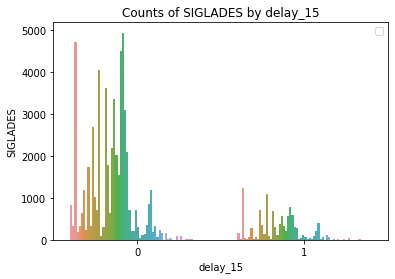

In [33]:
sns.countplot(x='delay_15', hue='SIGLADES', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('SIGLADES')
plt.title('Counts of SIGLADES by delay_15')
plt.legend(labels=[])
plt.show()

There are specific cities that have an influence on the delay.

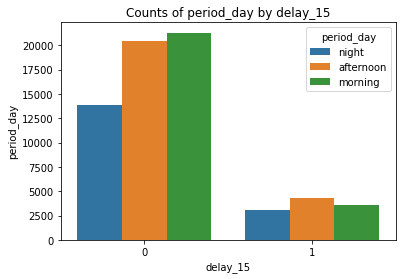

In [34]:
sns.countplot(x='delay_15', hue='period_day', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('period_day')
plt.title('Counts of period_day by delay_15')
plt.show()

Delays usually occur in the afternoon or nights with the follow ratio Ratio Referring to period day night delay:
0.1795447827372155 Ratio referring to period day afternoon delay:
0.17568222186339416 Ratio referring to period day morning delay:
0.1445502390422241

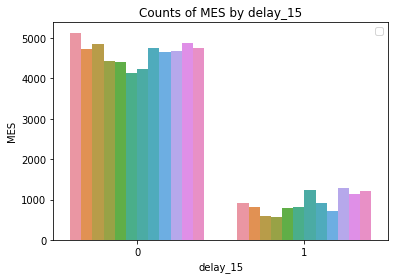

In [35]:
sns.countplot(x='delay_15', hue='MES', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('MES')
plt.title('Counts of MES by delay_15')
plt.legend(labels=[])
plt.show()

Depending on the month, it does provide information regarding the delay and it can be assimilated as that in holidays dates (December or July) there are considerable delays.

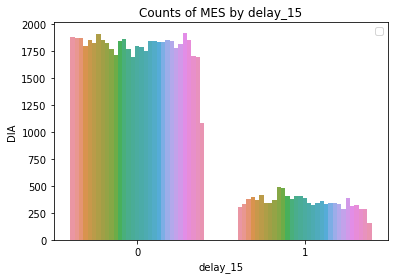

In [36]:
sns.countplot(x='delay_15', hue='DIA', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('DIA')
plt.title('Counts of MES by delay_15')
plt.legend(labels=[])
plt.show()

Depending on the day, it does not provide much information and there is an uniform distribution.

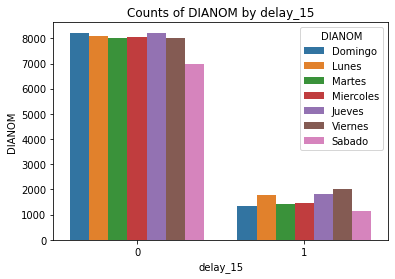

In [37]:
sns.countplot(x='delay_15', hue='DIANOM', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('DIANOM')
plt.title('Counts of DIANOM by delay_15')
plt.show()

It is interesting the afluent on saturday is lower than the rest of the days and in sunday looks like there is better chances to have a delay.

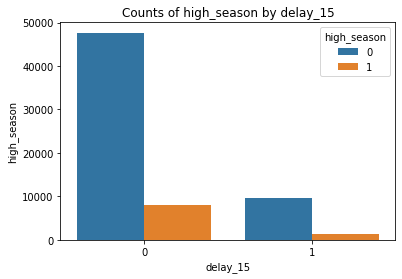

In [38]:
sns.countplot(x='delay_15', hue='high_season', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('high_season')
plt.title('Counts of high_season by delay_15')
plt.show()

Ratio referring to high season (1) and delay:
0.15366606363733107

Ratio referring to low season (0) and delay:
0.16689110019062275

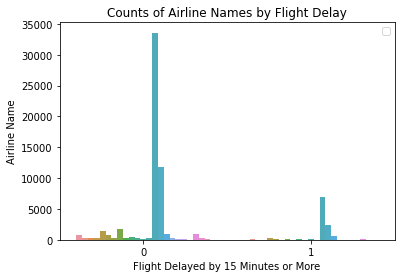

In [39]:
sns.countplot(x='delay_15', hue='OPERA', data=df)

# set axis labels and title
plt.xlabel('Flight Delayed by 15 Minutes or More')
plt.ylabel('Airline Name')
plt.title('Counts of Airline Names by Flight Delay')

# adjust the x-axis
plt.xticks(range(len(df['delay_15'].unique())), df['delay_15'].unique())
plt.legend(labels=[])


plt.show() 

Not much information on other flights mostly representing latam and sky airline. But we add a variable of probability to obtained the effect of delay in a better way.

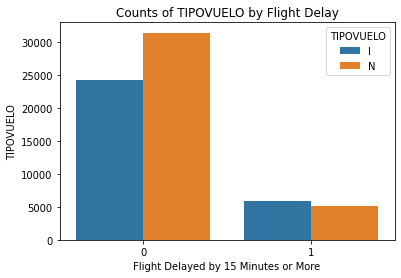

In [40]:
sns.countplot(x='delay_15', hue='TIPOVUELO', data=df)

# set axis labels and title
plt.xlabel('Flight Delayed by 15 Minutes or More')
plt.ylabel('TIPOVUELO')
plt.title('Counts of TIPOVUELO by Flight Delay')

# adjust the x-axis
plt.xticks(range(len(df['delay_15'].unique())), df['delay_15'].unique())



plt.show() 

International flights are more prone to delays. But nothing conclusive.

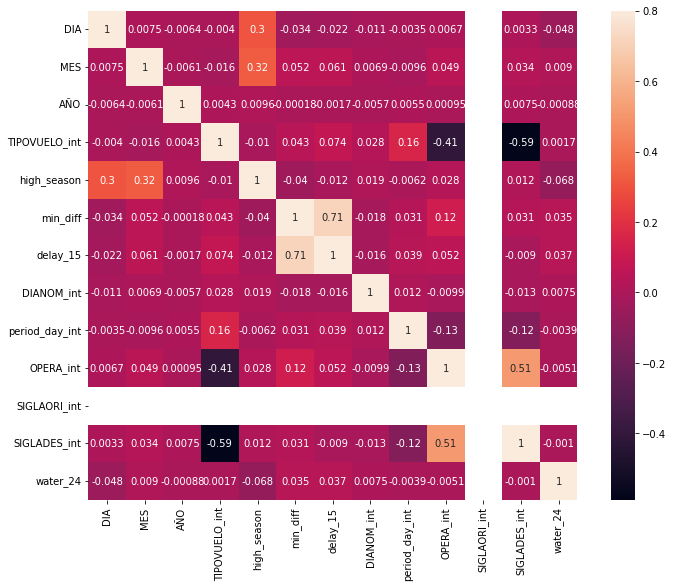

In [41]:
import plotly.graph_objs as go
import plotly.offline as pyoff
import seaborn as sns

corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

#3.- Predictive model

# Prepare the data

In [42]:

train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53262 entries, 43398 to 15795
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha-I                53262 non-null  object        
 1   Vlo-I                  53262 non-null  object        
 2   Ori-I                  53262 non-null  object        
 3   Des-I                  53262 non-null  object        
 4   Emp-I                  53262 non-null  object        
 5   Fecha-O                53262 non-null  object        
 6   Vlo-O                  53262 non-null  object        
 7   Ori-O                  53262 non-null  object        
 8   Des-O                  53262 non-null  object        
 9   Emp-O                  53262 non-null  object        
 10  DIA                    53262 non-null  int64         
 11  MES                    53262 non-null  int64         
 12  AÑO                    53262 non-null  int64         
 1

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13316 entries, 59036 to 55719
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha-I                13316 non-null  object        
 1   Vlo-I                  13316 non-null  object        
 2   Ori-I                  13316 non-null  object        
 3   Des-I                  13316 non-null  object        
 4   Emp-I                  13316 non-null  object        
 5   Fecha-O                13316 non-null  object        
 6   Vlo-O                  13316 non-null  object        
 7   Ori-O                  13316 non-null  object        
 8   Des-O                  13316 non-null  object        
 9   Emp-O                  13316 non-null  object        
 10  DIA                    13316 non-null  int64         
 11  MES                    13316 non-null  int64         
 12  AÑO                    13316 non-null  int64         
 1

In [78]:
import numpy as np

# Select columns 10,11,12,18,20,22,24,25,26,27,28,29
cols_1 = [10,11,18,20,22,24,25,26,27,29,32,33,34,35,36]

# Select columns 30 to 131
#cols_2 = np.r_[30:132]

# Combine both lists of columns
selected_cols = cols_1 #+ list(cols_2)

# Select the columns from the dataframe using iloc
df_m_train = train_df.iloc[:, selected_cols]
# Select the columns from the dataframe using iloc
df_m_test = test_df.iloc[:, selected_cols]

In [79]:
df_m_test

,DIA,MES,TIPOVUELO_int,high_season,min_diff,delay_15,DIANOM_int,period_day_int,OPERA_int,SIGLADES_int,water_24,prob_delay_1_opera,prob_delay_0_opera,prob_delay_1_siglades,prob_delay_0_siglades
59036,25,11,1,0,9.0,0,5,1,16,12,0.5,0.169487,0.156687,0.260407,0.162392
31867,30,6,1,0,-5.0,0,4,2,18,15,0.0,0.373513,0.159401,0.218324,0.159974
62245,28,12,1,1,4.0,0,3,2,3,5,0.0,0.023166,0.165160,0.085661,0.165273
58277,19,11,0,0,-1.0,0,6,1,16,29,0.0,0.169487,0.156687,0.109113,0.169038
63558,3,12,0,0,-5.0,0,6,0,20,26,0.0,0.089629,0.165584,0.147810,0.165525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29065,12,6,0,0,8.0,0,0,1,16,45,0.0,0.169487,0.156687,0.186391,0.164330
19364,16,4,1,0,-3.0,0,6,1,2,4,0.0,0.060201,0.165059,0.060201,0.165059
4469,19,1,0,0,-6.0,0,3,1,17,20,0.0,0.166327,0.163970,0.154495,0.165158
56025,8,11,1,0,-0.0,0,2,2,16,11,0.0,0.169487,0.156687,0.212121,0.161887


Standardize data

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


# select numerical columns using iloc and dtypes
numerical_cols = df_m_train.select_dtypes(include=[np.number]).columns

# create MinMaxScaler instance and fit on numerical columns
scaler = Normalizer()
scaler.fit(df_m_train[numerical_cols])

# apply transform and add new scaled columns with '_sc' suffix
df_m_train = df_m_train.copy()  # create a copy of the original DataFrame
df_m_train.loc[:, numerical_cols] = scaler.transform(df_m_train[numerical_cols])  # use loc for boolean indexing

# add suffix to column names
new_col_names = [col + '_sc' for col in numerical_cols]
df_m_train.columns = list(df_m_train.columns[:-len(numerical_cols)]) + new_col_names

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


# select numerical columns using iloc and dtypes
numerical_cols = df_m_test.select_dtypes(include=[np.number]).columns

# create MinMaxScaler instance and fit on numerical columns
scaler = Normalizer()
scaler.fit(df_m_test[numerical_cols])

# apply transform and add new scaled columns with '_sc' suffix
df_m_test = df_m_test.copy()  # create a copy of the original DataFrame
df_m_test.loc[:, numerical_cols] = scaler.transform(df_m_test[numerical_cols])  # use loc for boolean indexing

# add suffix to column names
new_col_names = [col + '_sc' for col in numerical_cols]
df_m_test.columns = list(df_m_test.columns[:-len(numerical_cols)]) + new_col_names


In [82]:
from sklearn.model_selection import train_test_split


# Separate the data into X (input features) and y (target variable)

X_cols = list(set(df_m_train.columns)-set(['min_diff_sc','delay_15_sc','delay_15_rate_sc']))
y_col = ['delay_15_sc']

X_train = df_m_train[X_cols].values
y_train = df_m_train[y_col].values
X_test = df_m_test[X_cols].values
y_test = df_m_test[y_col].values


# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (53262, 13)
y_train shape: (53262, 1)
X_test shape: (13316, 13)
y_test shape: (13316, 1)


In [83]:
df_m_train

,DIA_sc,MES_sc,TIPOVUELO_int_sc,high_season_sc,min_diff_sc,delay_15_sc,DIANOM_int_sc,period_day_int_sc,OPERA_int_sc,SIGLADES_int_sc,water_24_sc,prob_delay_1_opera_sc,prob_delay_0_opera_sc,prob_delay_1_siglades_sc,prob_delay_0_siglades_sc
43398,0.028182,0.253638,0.000000,0.000000,0.225456,0.000000,0.112728,0.000000,0.450911,0.817276,0.000000,0.004776,0.004416,0.003075,0.004764
50457,0.303854,0.303854,0.000000,0.000000,0.212698,0.000000,0.030385,0.030385,0.486167,0.729251,0.000000,0.005150,0.004761,0.004332,0.005024
63856,0.120453,0.289087,0.000000,0.000000,0.024091,0.000000,0.024091,0.000000,0.385449,0.867260,0.000000,0.004083,0.003775,0.001631,0.003971
27319,0.029513,0.177077,0.000000,0.000000,0.059026,0.000000,0.088539,0.029513,0.472206,0.855873,0.000000,0.005002,0.004624,0.003220,0.004989
11024,0.157790,0.063116,0.000000,0.000000,0.157790,0.000000,0.189349,0.000000,0.536488,0.788952,0.000000,0.005249,0.005175,0.004630,0.005197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.817454,0.184586,0.026369,0.026369,0.184586,0.000000,0.000000,0.000000,0.421912,0.290064,0.000000,0.004469,0.004132,0.005594,0.004269
6265,0.277603,0.092534,0.046267,0.000000,0.231336,0.000000,0.000000,0.046267,0.740275,0.555206,0.000000,0.007842,0.007249,0.012048,0.007513
54886,0.063922,0.351572,0.000000,0.000000,0.063922,0.000000,0.095883,0.031961,0.511378,0.767066,0.089491,0.005417,0.005008,0.004557,0.005284
860,0.160698,0.032140,0.000000,0.000000,-0.000000,0.000000,0.096419,0.032140,0.514232,0.835627,0.000000,0.005447,0.005036,0.004751,0.005320


# Differents models

In [84]:
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

X_train = df_m_train[X_cols].values
y_train = df_m_train[y_col].values
X_test = df_m_test[X_cols].values
y_test = df_m_test[y_col].values


# Create the model
model = LinearRegression(fit_intercept=False, copy_X=False, n_jobs=-1, positive=True)

# Create the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'n_jobs': [-1]
}
# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = model.predict(X_test)

# Make predictions and evaluate the model
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
ln_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
ln_e2= (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
ln_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
ln_e4= (metrics.max_error(y_test, y_pred))

# Print the best hyperparameters and their corresponding mean test score
print('Best params:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)

Root Mean Squared Error for Linear Regression: 0.007276393024608196
Variance score: 0.31
Mape: 9838629389426.01
max_error: 0.04
Best params: {'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Best score: -0.31206308463858834


In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

X_train = df_m_train[X_cols].values
y_train = df_m_train[y_col].values
X_test = df_m_test[X_cols].values
y_test = df_m_test[y_col].values


# Define the decision tree regressor model
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=2, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                           max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

# Define the grid search parameters
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a GridSearchCV object and fit to the training data
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
dt_best = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = dt_best.predict(X_test)

# Evaluate the model using various metrics
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
dt_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
dt_e2= (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
dt_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
dt_e4= (metrics.max_error(y_test, y_pred))

# Print the best hyperparameters and their corresponding mean test score
print('Best params:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)

#Root Mean Squared Error for Linear Regression: 0.06390763348078912
#Variance score: 0.55
#Mape: 544094622945.30
#max_error: 0.74
#Best params: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 6, 'splitter': 'random'}
#Best score: -0.5433921721352531

Root Mean Squared Error for Linear Regression: 0.004316226517560694
Variance score: 0.76
Mape: 2165103294385.95
max_error: 0.05
Best params: {'criterion': 'friedman_mse', 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Best score: -0.7547587555598909


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


1728 fits failed out of a total of 2592.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
418 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _valid

In [ ]:
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn import metrics

# Split the data into training and testing sets
#X_train = df_m_train[X_cols].values
#y_train = df_m_train[y_col].values
#X_test = df_m_test[X_cols].values
#y_test = df_m_test[y_col].values

# Define the model
#model = KNeighborsRegressor()

# Define the grid search parameters
#param_grid = {
#    'n_neighbors': [100, 200, 300],
#    'weights': ['uniform', 'distance'],
#    'metric': ['euclidean', 'manhattan', 'chebyshev', 'canberra'],
#    'leaf_size': [20, 30, 40]
#}

# Create a GridSearchCV object and fit to the training data
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
#grid_search.fit(X_train, y_train)

# Use the best hyperparameters to create the model
#best_model = grid_search.best_estimator_

# Evaluate the model using various metrics
#y_pred = best_model.predict(X_test)
#print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#kn_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
#kn_e2= (metrics.r2_score(y_test, y_pred))
#print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
#kn_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
#print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
#kn_e4= (metrics.max_error(y_test, y_pred))

# Print the best hyperparameters and their corresponding mean test score
#print('Best params:', grid_search.best_params_)
#print('Best score:', -grid_search.best_score_)

#Root Mean Squared Error for Linear Regression: 0.063890948041988
#Variance score: 0.55
#Mape: 620469750833.88
#max_error: 0.71
#Best params: {'leaf_size': 40, 'metric': 'manhattan', 'n_neighbors': 100, 'weights': 'uniform'}
#Best score: -0.5381708945834038

In [87]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

X_train = df_m_train[X_cols].values
y_train = df_m_train[y_col].values
X_test = df_m_test[X_cols].values
y_test = df_m_test[y_col].values

# Define the model with the best hyperparameters
best_model = KNeighborsRegressor(n_neighbors=100, weights='uniform', metric='manhattan', leaf_size=40)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Evaluate the model using various metrics
y_pred = best_model.predict(X_test)
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
kn_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
kn_e2= (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
kn_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
kn_e4= (metrics.max_error(y_test, y_pred))


Root Mean Squared Error for Linear Regression: 0.004448189585574109
Variance score: 0.74
Mape: 2520736244104.34
max_error: 0.05


In [ ]:
#import xgboost as xgb
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, max_error, r2_score

# Split the data into training and testing sets
#X_train = df_m_train[X_cols].values
#y_train = df_m_train[y_col].values
#X_test = df_m_test[X_cols].values
#y_test = df_m_test[y_col].values


#xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=40, max_depth= 500, 
#                             eta = 0.2, min_child_weight=1, alpha= 5, num_parallel_tree= 5)

# Define the grid search parameters
#param_grid = {
#    'max_depth': [3, 5, 7, 10],
#    'min_child_weight': [1, 3, 5],
#    'subsample': [0.6, 0.8, 1.0],
#    'colsample_bytree': [0.6, 0.8, 1.0],
#    'learning_rate': [0.1, 0.01, 0.001]
#}

# Create a GridSearchCV object and fit to the training data
#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1)
#grid_search.fit(X_train, y_train)

# Print the best hyperparameters
#print('Best params:', grid_search.best_params_)

# Make predictions on the test set using the best model
#best_xgb_model = grid_search.best_estimator_
#y_pred = best_xgb_model.predict(X_test)

# Compute the evaluation metrics for the best model
#print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#xgb_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
#xgb_e2= (metrics.r2_score(y_test, y_pred))
#print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
#xgb_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
#print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
#xgb_e4= (metrics.max_error(y_test, y_pred))

# Print the best hyperparameters and their corresponding mean test score
#print('Best params:', grid_search.best_params_)
#print('Best score:', -grid_search.best_score_)

#Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 1.0}
#Root Mean Squared Error for Linear Regression: 0.0624065238448978
#Variance score: 0.57
#Mape: 562123968452.08
#max_error: 0.73
#Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 1.0}
#Best score: -0.5531640844928655

In [88]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, max_error, r2_score

# Split the data into training and testing sets
X_train = df_m_train[X_cols].values
y_train = df_m_train[y_col].values
X_test = df_m_test[X_cols].values
y_test = df_m_test[y_col].values

# Define the model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=40, max_depth=7, min_child_weight=1, 
                                  subsample=0.8, colsample_bytree=0.6, learning_rate=0.1, num_parallel_tree=5)

# Fit the model to the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_xgb_model.predict(X_test)

# Compute the evaluation metrics for the best model
print('Root Mean Squared Error for XGBoost:', np.sqrt(mean_squared_error(y_test, y_pred)))
xgb_e1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (r2_score(y_test, y_pred)))
xgb_e2 = r2_score(y_test, y_pred)
print('Mape: %.2f' % (mean_absolute_percentage_error(y_test, y_pred)))
xgb_e3 = mean_absolute_percentage_error(y_test, y_pred)
print('max_error: %.2f' % (max_error(y_test, y_pred)))
xgb_e4 = max_error(y_test, y_pred)

Root Mean Squared Error for XGBoost: 0.003925723268851292
Variance score: 0.80
Mape: 4236301082136.66
max_error: 0.05


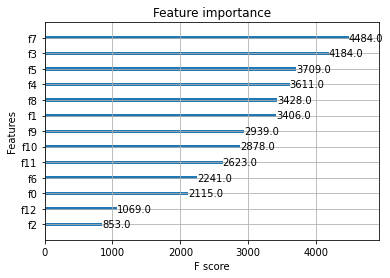

In [89]:
# Plot the feature importances
xgb.plot_importance(best_xgb_model)
plt.show()

In [90]:
X_cols

['DIANOM_int_sc',
 'MES_sc',
 'high_season_sc',
 'prob_delay_1_siglades_sc',
 'prob_delay_0_opera_sc',
 'OPERA_int_sc',
 'water_24_sc',
 'SIGLADES_int_sc',
 'DIA_sc',
 'TIPOVUELO_int_sc',
 'prob_delay_1_opera_sc',
 'prob_delay_0_siglades_sc',
 'period_day_int_sc']

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Split the data into training and testing sets
X_train = df_m_train[X_cols].values
y_train = df_m_train[y_col].values
X_test = df_m_test[X_cols].values
y_test = df_m_test[y_col].values

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
nn_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
nn_e2= (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
nn_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
nn_e4= (metrics.max_error(y_test, y_pred))



Epoch 1/100
1665/1665 [==============================] - 6s 3ms/step - loss: 6.2617e-04 - mse: 6.2617e-04 - val_loss: 7.4177e-05 - val_mse: 7.4177e-05
Epoch 2/100
1665/1665 [==============================] - 4s 2ms/step - loss: 7.5032e-05 - mse: 7.5032e-05 - val_loss: 7.0709e-05 - val_mse: 7.0709e-05
Epoch 3/100
1665/1665 [==============================] - 4s 2ms/step - loss: 7.1488e-05 - mse: 7.1488e-05 - val_loss: 6.6173e-05 - val_mse: 6.6173e-05
Epoch 4/100
1665/1665 [==============================] - 5s 3ms/step - loss: 6.7030e-05 - mse: 6.7030e-05 - val_loss: 5.7651e-05 - val_mse: 5.7651e-05
Epoch 5/100
1665/1665 [==============================] - 4s 2ms/step - loss: 6.0931e-05 - mse: 6.0931e-05 - val_loss: 4.5039e-05 - val_mse: 4.5039e-05
Epoch 6/100
1665/1665 [==============================] - 4s 2ms/step - loss: 5.7508e-05 - mse: 5.7508e-05 - val_loss: 4.3816e-05 - val_mse: 4.3816e-05
Epoch 7/100
1665/1665 [==============================] - 5s 3ms/step - loss: 5.5104e-05 - mse:

In [92]:
# Import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Split the data into training and testing sets
X_train = df_m_train[X_cols].values
y_train = df_m_train[y_col].values
X_test = df_m_test[X_cols].values
y_test = df_m_test[y_col].values

# Define a function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

# Create the model using the best hyperparameters
model = create_model()

# Train the model on the full training set
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
nn2_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
nn2_e2= (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
nn2_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
nn2_e4= (metrics.max_error(y_test, y_pred))



Epoch 1/50
1665/1665 [==============================] - 6s 3ms/step - loss: 1.1519e-04 - mse: 1.1519e-04 - val_loss: 4.2719e-05 - val_mse: 4.2719e-05
Epoch 2/50
1665/1665 [==============================] - 4s 2ms/step - loss: 5.1685e-05 - mse: 5.1685e-05 - val_loss: 4.3176e-05 - val_mse: 4.3176e-05
Epoch 3/50
1665/1665 [==============================] - 4s 2ms/step - loss: 4.3536e-05 - mse: 4.3536e-05 - val_loss: 2.5881e-05 - val_mse: 2.5881e-05
Epoch 4/50
1665/1665 [==============================] - 5s 3ms/step - loss: 3.9647e-05 - mse: 3.9647e-05 - val_loss: 2.7279e-05 - val_mse: 2.7279e-05
Epoch 5/50
1665/1665 [==============================] - 4s 2ms/step - loss: 4.1752e-05 - mse: 4.1752e-05 - val_loss: 4.0988e-05 - val_mse: 4.0988e-05
Epoch 6/50
1665/1665 [==============================] - 4s 2ms/step - loss: 4.0323e-05 - mse: 4.0323e-05 - val_loss: 2.8196e-05 - val_mse: 2.8196e-05
Epoch 7/50
1665/1665 [==============================] - 5s 3ms/step - loss: 4.1025e-05 - mse: 4.1025

Code used to find the params for nn model.

In [ ]:
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
#from sklearn.model_selection import GridSearchCV

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create the model
#def create_model(activation='relu', neurons=64, dropout_rate=0.5):
#    model = Sequential()
#    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
#    model.add(Dropout(dropout_rate))
#    model.add(Dense(neurons//2, activation=activation))
#    model.add(Dropout(dropout_rate))
#    model.add(Dense(1))
#    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
#    return model

# Create a KerasRegressor object for use in GridSearchCV
#model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid search parameters
#param_grid = {
#    'activation': ['relu', 'tanh', 'sigmoid'],
#    'neurons': [32, 64, 128],
#    'dropout_rate': [0.2, 0.5, 0.8]
#}

# Create a GridSearchCV object and fit to the training data
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
#grid_search.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)

# Print the best hyperparameters and their corresponding mean test score
#print('Best params:', grid_search.best_params_)
#print('Best score:', -grid_search.best_score_)

Code used to find the params for svr model

In [96]:
#from sklearn.svm import SVR
#from sklearn.model_selection import GridSearchCV

# Split the data into training and testing sets
#X_train = df_m_train[X_cols].values
#y_train = df_m_train[y_col].values
#X_test = df_m_test[X_cols].values
#y_test = df_m_test[y_col].values

# Define the parameter grid
#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'gamma': [0.01, 0.1, 1, 'scale'],
#    'kernel': ['linear', 'rbf', 'poly']
#}

# Create a GridSearchCV object and fit to the training data
#svr = SVR()
#grid_search = GridSearchCV(svr, param_grid=param_grid, cv=3, n_jobs=-1)
#grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding mean test score
#print('Best params:', grid_search.best_params_)
#print('Best score:', -grid_search.best_score_)

#Best params: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
#Best score: 7.891211296117312

Best params: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best score: 7.891211296117312


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [97]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train = df_m_train[X_cols].values
y_train = df_m_train[y_col].values
X_test = df_m_test[X_cols].values
y_test = df_m_test[y_col].values

# Train the SVR model with the best hyperparameters
svr = SVR(kernel='linear', C=0.1, gamma=0.01)
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Evaluate the model using various metrics
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
svr_e1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
svr_e2= (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
svr_e3= (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
svr_e4= (metrics.max_error(y_test, y_pred))


Root Mean Squared Error for Linear Regression: 0.026514529203435146
Variance score: -8.15
Mape: 107715508121542.03
max_error: 0.03


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



#Stack model

First we going to analize differents metrics of every model.

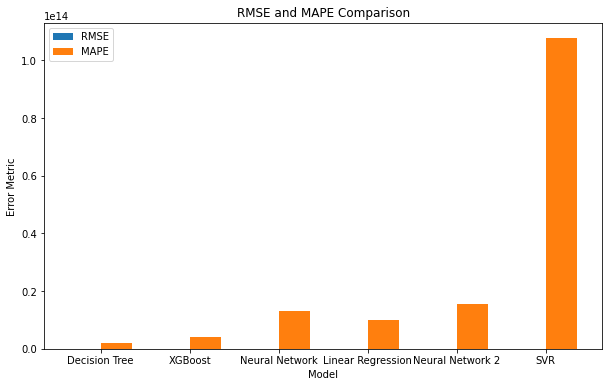

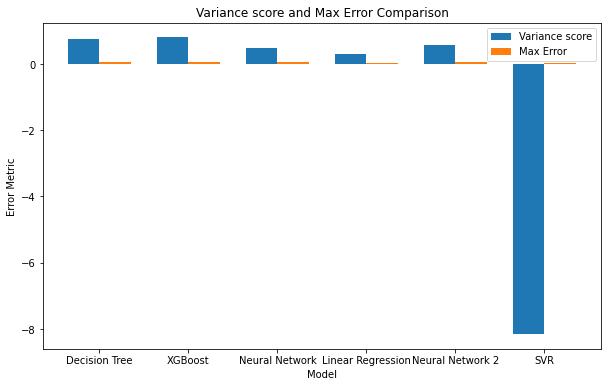

Mean RMSE: 0.009033616200381256
Mean Variance Score: -0.8744840393837356
Mean MAPE: 25444903249344.152
Mean Max Error: 0.04348704891746697


In [104]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# Initialize the error arrays
dt_error = [dt_e1, dt_e2, dt_e3, dt_e4]
xgb_error = [xgb_e1, xgb_e2, xgb_e3, xgb_e4]
nn_error = [nn_e1, nn_e2, nn_e3, nn_e4]
ln_error = [ln_e1, ln_e2, ln_e3, ln_e4]
nn2_error = [nn2_e1, nn2_e2, nn2_e3, nn2_e4]
svr_error = [svr_e1, svr_e2, svr_e3, svr_e4]

# Calculate the mean of each error metric
rmse = [np.mean(dt_e1), np.mean(xgb_e1), np.mean(nn_e1), np.mean(ln_e1), np.mean(nn2_e1), np.mean(svr_e1)]
variance_score = [np.mean(dt_e2), np.mean(xgb_e2), np.mean(nn_e2), np.mean(ln_e2), np.mean(nn2_e2), np.mean(svr_e2)]
mape = [np.mean(dt_e3), np.mean(xgb_e3), np.mean(nn_e3), np.mean(ln_e3), np.mean(nn2_e3), np.mean(svr_e3)]
max_error = [np.mean(dt_e4), np.mean(xgb_e4), np.mean(nn_e4), np.mean(ln_e4), np.mean(nn2_e4), np.mean(svr_e4)]

# Plot the error metrics for each model
labels = ['Decision Tree', 'XGBoost', 'Neural Network', 'Linear Regression', 'Neural Network 2', 'SVR']

# RMSE and MAPE plot
plt.figure(figsize=(10, 6))
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, rmse, width, label='RMSE')
plt.bar(x + width/2, mape, width, label='MAPE')

plt.xlabel('Model')
plt.ylabel('Error Metric')
plt.title('RMSE and MAPE Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()

# Variance score and Max Error plot
plt.figure(figsize=(10, 6))
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, variance_score, width, label='Variance score')
plt.bar(x + width/2, max_error, width, label='Max Error')

plt.xlabel('Model')
plt.ylabel('Error Metric')
plt.title('Variance score and Max Error Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()

# Print the mean of each metric
print('Mean RMSE:', np.mean(rmse))
print('Mean Variance Score:', np.mean(variance_score))
print('Mean MAPE:', np.mean(mape))
print('Mean Max Error:', np.mean(max_error))

The two best models chosen are xgboost and decision tree to perform a stacking model.

In [99]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the data into training and testing sets
X_train = df_m_train[X_cols].values
y_train = df_m_train[y_col].values
X_test = df_m_test[X_cols].values
y_test = df_m_test[y_col].values

# Initialize the base models
estimators = [('xgb', XGBRegressor(colsample_bytree=1.0, learning_rate=0.1, max_depth=10, min_child_weight=1, subsample=1.0)),
              ('dt', DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter='random'))]

# Initialize the stacking model
stack_model = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())

# Train the stacking model
stack_model.fit(X_train, y_train)

# Make predictions
y_pred = stack_model.predict(X_test)

# Evaluate the model using various metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
stack_e1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
stack_e2 = (metrics.r2_score(y_test, y_pred))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
stack_e3 = (metrics.mean_absolute_percentage_error(y_test, y_pred))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
stack_e4 = (metrics.max_error(y_test, y_pred))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Root Mean Squared Error: 0.0032370231752920663
Variance score: 0.86
Mape: 1430069283349.18
max_error: 0.05


Let's try to find the best params via gridsearch and using xgb model to ensamble. (Due to time of execution, this one can not be implemented in this opportunity, and in the same lack of time and execution power, we can not try more combination of the stacking model)




In [101]:
#import numpy as np
#import pandas as pd
#from sklearn.ensemble import StackingRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
#from xgboost import XGBRegressor
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn import metrics

# Split the data into training and testing sets
#X_train = df_m_train[X_cols].values
#y_train = df_m_train[y_col].values
#X_test = df_m_test[X_cols].values
#y_test = df_m_test[y_col].values


# Initialize the base models
#estimators = [('xgb', XGBRegressor(colsample_bytree=1.0, learning_rate=0.1, max_depth=10, min_child_weight=1, subsample=1.0)),
#              ('dt', DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter='random'))]

# Set the parameter grid for XGBoost
#xgb_params = {'xgb__learning_rate': [0.01, 0.1, 0.5],
#              'xgb__max_depth': [3, 5, 10],
#              'xgb__subsample': [0.5, 0.8, 1.0],
#              'xgb__colsample_bytree': [0.5, 0.8, 1.0]}

# Initialize the stacking model
#stack_model = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())

# Initialize the grid search object
#grid_search = GridSearchCV(stack_model, param_grid={'xgb__learning_rate': [0.01, 0.1, 0.5],
#                                                    'xgb__max_depth': [3, 5, 10],
#                                                    'xgb__subsample': [0.5, 0.8, 1.0],
#                                                    'xgb__colsample_bytree': [0.5, 0.8, 1.0]}, cv=5, scoring='neg_mean_squared_error')
#
# Train the stacking model with grid search
#grid_search.fit(X_train, y_train)

# Make predictions
#y_pred = grid_search.predict(X_test)

# Evaluate the model using various metrics
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#stack_e1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
#stack_e2 = (metrics.r2_score(y_test, y_pred))
#print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
#stack_e3 = (metrics.mean_absolute_percentage_error(y_test, y_pred))
#print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))
#stack_e4 = (metrics.max_error(y_test, y_pred)) 



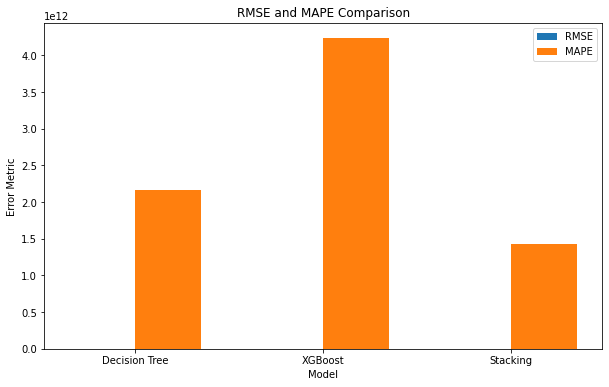

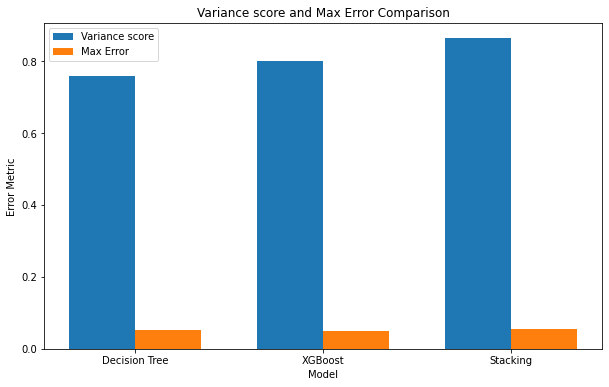

Mean RMSE: 0.0038263243205680173
Mean Variance Score: 0.8068683146405092
Mean MAPE: 2610491219957.264
Mean Max Error: 0.05239845198105386


In [103]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# Initialize the error arrays
dt_error = [dt_e1, dt_e2, dt_e3, dt_e4]
xgb_error = [xgb_e1, xgb_e2, xgb_e3, xgb_e4]
stack_error = [stack_e1, stack_e2, stack_e3, stack_e4]

# Calculate the mean of each error metric
rmse = [np.mean(dt_e1), np.mean(xgb_e1), np.mean(stack_e1)]
variance_score = [np.mean(dt_e2), np.mean(xgb_e2), np.mean(stack_e2)]
mape = [np.mean(dt_e3), np.mean(xgb_e3), np.mean(stack_e3)]
max_error = [np.mean(dt_e4), np.mean(xgb_e4),  np.mean(stack_e4)]

# Plot the error metrics for each model
labels = ['Decision Tree', 'XGBoost', 'Stacking']

# RMSE and MAPE plot
plt.figure(figsize=(10, 6))
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, rmse, width, label='RMSE')
plt.bar(x + width/2, mape, width, label='MAPE')

plt.xlabel('Model')
plt.ylabel('Error Metric')
plt.title('RMSE and MAPE Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()

# variance score and Max Error plot
plt.figure(figsize=(10, 6))
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, variance_score, width, label='Variance score')
plt.bar(x + width/2, max_error, width, label='Max Error')

plt.xlabel('Model')
plt.ylabel('Error Metric')
plt.title('Variance score and Max Error Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()

# Print the mean of each metric
print('Mean RMSE:', np.mean(rmse))
print('Mean Variance Score:', np.mean(variance_score))
print('Mean MAPE:', np.mean(mape))
print('Mean Max Error:', np.mean(max_error))



We can see the final results of the stacking model. 

---


Root Mean Squared Error: 0.0032370231752920663
Variance score: 0.86
Mape: 1430069283349.18
max_error: 0.05

# 4.- Results

1. How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?


---
There are different insight such as those presented during the preparation of the EDA, here a brief summary:
*   It shows that the largest number of flights in this data correspond to Grupo LATAM airlines with about 58%.
*   The Top 5 destinations are: Buenos Aires,     Antofagasta,   Lima,             
Calama and           Puerto Montt.
*   Most flights are made during the month of December and on Fridays.

---



2. Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:
○ high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
○ min_diff : difference in minutes between Date-O and Date-I .
○ delay_15 : 1 if min_diff > 15, 0 if not.
○ period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based
onDate-I . Done, it is in the repository.

---

Completed is in the repository as requested. There was one detailed that we mention, but we mention again: According to the general instructions, the landing and takeoff of aircraft should be considered, but it is not clear from the given times whether it refers to landing or taking off. After reviewing the variables, it is not possible to determine the exact nature of the event without an additional variable. Therefore, a function has been created which takes only time into consideration. In cases where the result of subtraction is negative, it will be considered as a negative value for the purpose of entering it into the prediction. This detailed causing confusion in generating min_diff variable specifically.


---



3. What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight?What
variables would you expect to have the most influence in predicting delays?

---

A deep analysis is performed in the eda where it is analyzed according to the variable created delay 15 and the behavior as between every other variable as well as graphs. On the other hand, probability variables were created in order to take into consideration airplane lines and destinations, with greater preponderance in the models. 

---


4. Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay.
Feel free to generate additional variables and/or supplement with external variables.

---

For the analysis we will consider predicting the variable delay_15, which means predicting whether a plane is delayed or not. It is mentioned that it is perfectly possible to try to predict in minutes using the min_diff variable but for this analysis we will consider delay 15.
Different models are trained as seen in the predictive model section, in addition to an analysis of individuals models and a stacking of these, a grid search is performed to maximize the statistics of these. 24-hour rainfall and probability variables are added to the analysis, during the test and error of this challenge it is seen how the models improve when theses variables were added. Overall, the best-performing individual model was the xgboost, and in addition the stacking model with xgbost and decision tree give better results. However, other models are not ruled out as it is a fresh project, with many variables still to be added and things to improved which is developed in more detail in question 5.

---


5. Evaluate model performance in the predictive task across each model that you trained. Define and justify what metrics you used
to assess model performance. Pick the best trained model and evaluate the following: What variables were the most influential in
the prediction task? How could you improve the
Performance?

---

The chosen metrics for error are variance score, RMSE, MAPE, and max error, in order of importance.
On the other hand, there were done an analisis of the features via xgb model, in this we can see the direct influence of this variables and importance of each in the predictives models.
As you may be aware, we have been working on a challenge that requires us to produce accurate results based on specific metrics. While we have made significant progress, we have not yet achieved the level of success that we had hoped for. In particular, we have seen promising results using a stake model composed of XGBoost and decision tree models, which has yielded a Root Mean Squared Error: 0.0032370231752920663,
Variance score: 0.86,
Mape: 1430069283349.18 and
max_error: 0.05. We believe that with more time and further refinement, we can continue to build on these successes and ultimately achieve the desired level of accuracy.

However, there are different things that can be done in order to improve this prediction.


---



#5.- Recomendations to improved the model (Question 5)

Recommendations to improve the model for predicting delays in airplane takeoff and landing:

Add weather information: Weather can have a significant impact on flight delays, so incorporating weather data into the model can help improve its accuracy. Factors such as temperature, precipitation, wind speed, and cloud cover can all affect flight operations. In this phase of the project, the weather condition of rain was added, which helped in the predictions, however, it was not refined to a great extent, besides adding variables such as wind and cloudiness.

Include additional variables: Adding variables such as gate location, flight distance, online boarding, baggage handling, inflight wifi service, satisfaction, customer type,  characteristics of each aircraft, e.g. size of aircraft, personnel on board and gender can provide more information about the factors that contribute to flight delays. This can help the model identify patterns and relationships that may not be captured by the existing variables.

Add variables of business and operational importance, e.g. if the aircraft is oversold or if the destination is continuously full.

Manage outliers: Outliers can have a significant impact on model performance, so it is important to identify and manage them appropriately. This can involve removing outliers or transforming the data to reduce their impact. For this stage of the project a preliminary analysis of outliers was made, however, by adding more data, years 2017 onwards the outliers could change and there is room for improvement in this aspect.

Use more data: Using more data beyond just the 2017 dataset can provide a more comprehensive understanding of the problem and help the model identify more patterns and relationships. This can lead to better accuracy and generalization of the model.

Optimize execution time: As the size of the dataset and complexity of the model increases, it may become necessary to optimize the execution time of the model. This can involve techniques such as parallel processing, distributed computing, or using more efficient algorithms.In the current state of the project it is already difficult to compute power, taking some excessive time for modelling. This point in particular slows down the training and modelling process of the proposed neural network models. 

Overall, these recommendations can help improve the accuracy and generalization of the model for predicting delays in airplane takeoff and landing. By incorporating more variables, managing outliers, using more data, and optimizing execution time, the model can better capture the factors that contribute to flight delays and provide more accurate predictions.





As an aside, we reviewed the literature and found that with neural network models could be a good solution. 

In the paper "Flight delay prediction based on deep learning and Levenberg-Marquart algorithm", the Levenberg-Marquardt algorithm is used as an optimization algorithm for training the neural network. Specifically, the algorithm is used to minimize the mean squared error between the predicted and actual flight delay values. We integrated an algorithm along these lines and also integrated a grid search in order to obtain the best results, however, due to lack of time we are unable to continue exploring this solution.

The Levenberg-Marquardt algorithm is a commonly used optimization algorithm for training neural networks. It combines the steepest descent method with a trust region approach to achieve fast convergence to a local minimum of the objective function. It is particularly well-suited for solving nonlinear least squares problems, which makes it a popular choice for training neural networks.